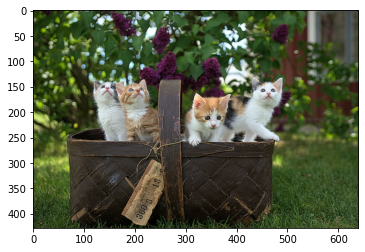

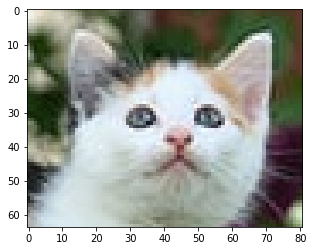

In [35]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('../Resources/Photos/cats.jpg')

# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
tmp_img = cv2.imread('../Resources/Photos/template-cat.PNG')

# tmp_img = cv2.cvtColor(tmp_img,cv2.COLOR_BGR2GRAY)
tmp_img = cv2.cvtColor(tmp_img,cv2.COLOR_BGR2RGB)
imgPlot=plt.imshow(img)
plt.show()
tmp_imp_plt = plt.imshow(tmp_img)
plt.show()



(3, 81, 64)


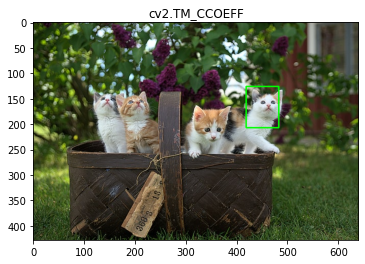

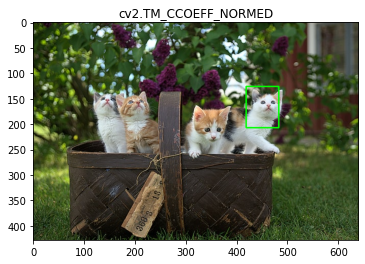

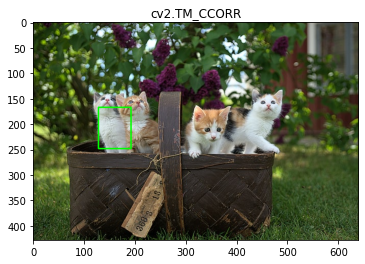

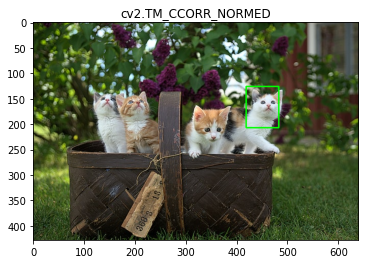

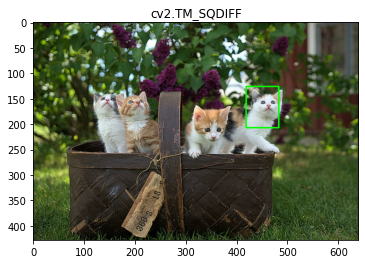

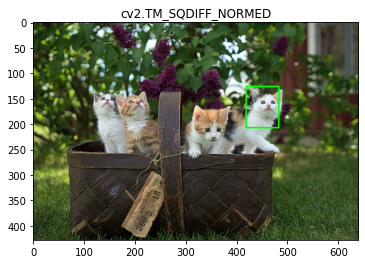

In [36]:
print(tmp_img.shape[::-1])
w, h , color= tmp_img.shape
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    method = eval(meth)
    img1 = img.copy()
    res = cv2.matchTemplate(img1,tmp_img,method)

    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left_coordinates = min_loc
    else:
        top_left_coordinates = max_loc
    
    bottom_right_coordinates = (top_left_coordinates[0]+w,top_left_coordinates[1]+h)
    cv2.rectangle(img1,top_left_coordinates,bottom_right_coordinates,(0,255,0),2)
    imgplot = plt.imshow(img1)
    plt.title(meth)
    plt.show()